# Case Study on Probability for Data Science

Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [1]:
#Importing required python libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading csv file to dataframe format
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#concise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
#statistics of columns
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [5]:
data.shape

(8124, 23)

8124 mushroom instances and 23 specifications

In [6]:
#Check any null values present
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [8]:
#count of unique occurence of class columns
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

edible mushroom (e) = 4208 ,
poisonous mushroom(p) = 3916

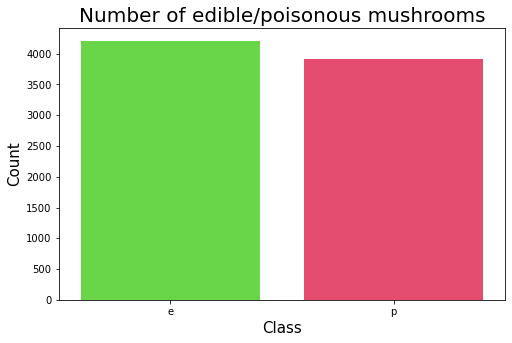

In [9]:
#visualization of edible and poisonous mushrooms using barplot
count = data['class'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
#count.index --> ‘e’ and ‘p’
#count.values -->count of e(4208) and p(3916)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Class', fontsize=15)
plt.title('Number of edible/poisonous mushrooms',fontsize=20)
plt.show()

In [10]:
#dataset is balanced

In [11]:
#The data is categorical use LabelEncoder to convert it to ordinal.
#LabelEncoder converts each value in a column to a number.
#our columns are of ‘object’ datatype,change the type to ‘category’ 
data=data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [12]:
labelencoder=LabelEncoder()
for column in data.columns:
    data[column]=labelencoder.fit_transform(data[column])


In [13]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
#convert all column values to ordinal

In [15]:
data['veil-type'].unique()

array([0])

In [16]:
#values in column "veil-type" is zero and no contribution to data. so remove it.
data=data.drop(['veil-type'],axis=1)

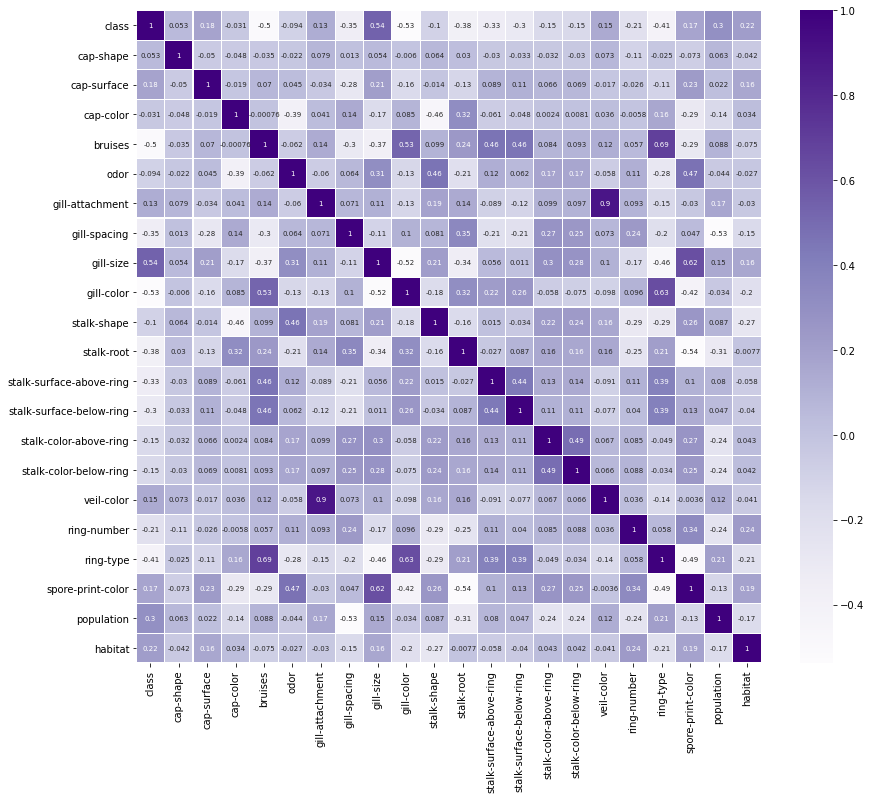

In [17]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

Usually, the least correlating variable is the most important one for classification.In this case, “gill-color” is -0.53

### Splitting the data into train and test set

In [18]:
#We want to predict the class of mushroom
x=data.drop(['class'],axis=1)  #feature set
y=data['class']                #target variable

In [19]:
x.head(3)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3


In [20]:
y.head(3)

0    1
1    0
2    0
Name: class, dtype: int32

In [21]:
# Splitting the dataset into the training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
x_train.shape

(5686, 21)

In [23]:
x_test.shape

(2438, 21)

# Classification Methods

## Decision Tree Classification

In [24]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred_dt=dt.predict(x_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test,y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Test Accuracy: 100.0%


In [26]:
#Confusion Matrix for Decision Tree Classifier
cm=confusion_matrix(y_test,y_pred_dt)
cm

array([[1272,    0],
       [   0, 1166]], dtype=int64)

## Logistic Regression Classification

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))

Test Accuracy: 94.67%


In [28]:
y_pred_lr=lr.predict(x_test)
print("Logistic Regression Classifier report: \n\n",classification_report(y_test,y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1272
           1       0.96      0.93      0.94      1166

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [29]:
#Confusion Matrix for Logistic Regression Classifier
cm=confusion_matrix(y_test,y_pred_lr)
cm

array([[1223,   49],
       [  81, 1085]], dtype=int64)

## KNN Classification

In [30]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    if knn.score(x_test, y_test) > best_score:
        best_score = knn.score(x_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [31]:
y_pred_knn = knn.predict(x_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       0.99      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [32]:
#Confusion Matrix for KNN Classifier
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[1266,    6],
       [   3, 1163]], dtype=int64)

## SVM Classification

In [33]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [34]:
y_pred_svm = svm.predict(x_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [35]:
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM Classifier: \n\n",cm)

Confusion Matrix for SVM Classifier: 

 [[1272    0]
 [   0 1166]]


## Naive Bayes Classification

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test, y_test)*100, 2)))

Test Accuracy: 91.51%


In [37]:
y_pred_nb = nb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1272
           1       0.90      0.92      0.91      1166

    accuracy                           0.92      2438
   macro avg       0.91      0.92      0.91      2438
weighted avg       0.92      0.92      0.92      2438



In [38]:
cm = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix for Naive Bayes Classifier: \n\n",cm)

Confusion Matrix for Naive Bayes Classifier: 

 [[1158  114]
 [  93 1073]]


## Random Forest Classification

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [40]:
y_pred_rf = rf.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [41]:
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest Classifier: \n\n",cm)

Confusion Matrix for Random Forest Classifier: 

 [[1272    0]
 [   0 1166]]


In [42]:
#Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.
preds = dt.predict(x_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0]
[1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0]


 predicted and the true values match 100%.

From the confusion matrix, we saw that our train and test data is balanced.

Most of the classification methods hit 100% accuracy with this dataset.We can eat healthy mushrooms. 